# <center> Laboratorio 1 </center>
## <center> Computación científica II </center>
## <center> Ariel Sanhueza Román - asanhuez@alumnos.inf.utfsm.cl - 201173005-4 </center>
## <center> Gonzalo Moya Rodríguez - gemoya@alumnos.inf.utfsm.cl - 201173016-k </center>

# Introducción
bla bla

# Previo
Primero, importaremos las bibliotecas previas:

In [37]:
import numpy as np
from scipy import linalg
%matplotlib inline
from matplotlib import pyplot as plt
from numpy.linalg import norm, solve
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Ahora, cargaremos los datos entregados y generamos el vector inicial:

In [38]:
cov_x = np.load('arcene.npy')
cov_x -= cov_x.mean(axis=0)
cov_x = np.dot(np.transpose(cov_x),cov_x)
n = cov_x.shape[1]
cov_x = np.divide(cov_x,n-1)
i_guess  = np.ones(cov_x.shape[0])

# Desarrollo

## Pregunta 1
Primero, implementaremos los algoritmos de $\textbf{Power Iteration}$ y $\textbf{Rayleigh Quotient Iteration}$

### Power Iteration

In [39]:
# Adaptación del algoritmo publicado en el ipython de clases
def powerit(A, x, k):
  """
  Program 12.1 Power iteration
  Computes dominant eigenvector of square matrix
  Input: matrix A, initial (nonzero) vector x, number of steps k
  Output: dominant eigenvalue lam, eigenvector u
  """
  for j in range(k):
    u = np.divide(x, linalg.norm(x))
    x = np.dot(A, u)
    lam = float(np.dot(u.T, x))
  u = np.divide(x, linalg.norm(x))
  return lam, u

Dentro de todo el algoritmo, las líneas más costosas son (con sus respectivas complejidades):
* np.dot(A,U) $\rightarrow O(n^2)$, pues es un producto matriz vector.
* np.dot(u.T, x) $\rightarrow O(n)$, pues es un producto vector vector.
* El loop for, que depende de k.

Por lo que la complejidad de este algoritmo es de orden $O(kn^2)$

### Rayleigh Quotient Iteration

In [40]:
# Adaptación del algoritmo publicando en el ipython de clases
def rqi(A, x, k):
  """
  Program 12.3 Rayleigh Quotient Iteration
  Input: matrix A, initial (nonzero) vector x, number of steps k
  Output: eigenvalue lam, eigenvector of inv(A-sI)
  """
  for j in range(k):
    u = np.divide(x, linalg.norm(x))
    lam = float(np.dot(u.T, np.dot(A, u)))
    x = np.linalg.solve(A -lam*np.eye(*A.shape), u)
  u = np.divide(x, linalg.norm(x))
  lam = float(np.dot(u.T, np.dot(A, u)))
  return lam, u

Dentro de todo el algoritmo, las líneas más costosas son (con sus respectivas complejidades):
* np.dot(u.T, np.dot(A, u)) $\rightarrow O(n^2)$, pues está compuesto por dos productos puntos, por lo que la línea completa son aproximadamente $n^2 + n$ operaciones, lo que asintóticamente es $O(n^2)$
* El loop for, que depende de k
Por lo que la complejidad de este algoritmo es de orden $O(kn^2)$

## Pregunta 2

### Parte a)
Primero, como $A$ es simétrica, tenemos que sus valores propios son reales y sus vectores propios son ortogonales entre sí.

Tomemos $B = A - \lambda_iv_iv^T_i$. Entonces:

\begin{align*}
    Bv_k &= \lambda_kv_k \\
    (A - \lambda_iv_iv^T_i)v_k &= \lambda_kv_k \\
    Av_k - \lambda_iv_iv^T_iv_k &= \lambda_kv_k,\texttt{ pero }v^T_iv_k = 0 \\
    Av_k &= \lambda_kv_k
\end{align*}

Entonces vemos que los vectores y valores propios son los mismos en A y en B.

Ahora supongamos que $v_1$ es el vector propio dominante y $\lambda_1$ es el valor propio dominante de A (encontrado en la primera iteración, pues el valor y vector propio inicial son cero). 

\begin{align*}
    Bv_i &= \lambda_iv_i \\
    (A - \lambda_1v_1v^T_1)v_i &= \lambda_iv_i \\
    Av_i - \lambda_1v_1v^T_1v_i &= \lambda_iv_i, \texttt{ pero para } i \neq 1 \rightarrow v^T_1v_i = 0 \\
    Av_i &= \lambda_iv_i
\end{align*}

Entonces, se tienen que si aplicamos power iteration en B, encontraremos su valor/vector propio dominante. Pero como los vectores son los mismos en A y en B y $v_1$ y $\lambda_1$ no son dominantes en B, entonces los dominantes en B son los segundos más grandes en A. Si aplicamos esto $k$ veces, obtenemos los $k$ vectores y valores propios dominantes de A

### Parte b)
La complejidad de Power iteration vimos que era $O(pn^2)$ (en el caso del algoritmo propuesto, en power iteration $k = p$). Como el power iteration es ejecutado $k$ veces, entonces la complejidad total es $O(kpn^2)$.

### Parte c)

In [41]:
def k_eigen_finder(A, p, k, v_0):
    v = v_0
    l = 0
    lambdas = []
    vectors = []
    for i in range(k):
        A = A - l*np.dot(v, np.transpose(v))
        l, v = powerit(A, np.ones((A.shape[0],1)), p)
        lambdas.append(l)
        vectors.append(v)
    return lambdas, vectors

## Pregunta 3
### Parte a)

### Parte b) 

Tomando en cuenta que calcular la potencia p de una matriz es equivalente a computar el producto matriz,matriz p veces, esto nos entrega una complejidad de $O(2pn^3)$, con $2n$ para el prodcuto y $n^2$ para la matriz.
Luego dentro del algoritmo detectamos instrucciones relevantes como el producto matriz vector de complejidad de $2n^2$ y posteriormente el producto matriz vector con $2n^2$ más el producto vector vector de complejidad $2n$.Estas instrucciones se realiza $k$ veces por lo que para obtener la complejidad general se construye dependiendo del numero de ciclos, es decir si $k<8np$ entonces la complejidad será $O(2pn^3)$, de lo contrario es $O(4kn^2)$. 

### Parte c)

In [101]:
def k_eigen_finder_plus(A, p, k, v_0):
    #A = np.dot(A.T,A)
    A_p = np.linalg.matrix_power(A, 2*p)
    #A_p = A**p
    l = 0
    v = np.zeros((A.shape[0], 1))
    x = v_0
    lambdas = []
    vectors = []
    for i in range(k):
        A_p = A_p - (l**p)*np.dot(v, np.transpose(v))
        v = np.dot(A_p,x)
        v = np.divide(v, np.linalg.norm(v))
        l = np.dot(v.T, np.dot(A, v))
        lambdas.append(l)
        vectors.append(v)
    return lambdas, vectors


## Pregunta 4
### Parte a)
Las modificaciones son pocas y simples:
* Si nuestra mariz es de dimensiones $nxn$, nuestro Q_0 inicial es cualquier matriz de dimensiones $nxk$, donde $k$ es la cantidad de eigen values que queremos encontrar.
* Al realizar la descomposición QR, usaremos su versión reducida.

### Parte b)
La complejidad de este nuevo algoritmo está determinada por:
* La factorización QR, que es de complejidad $O(n^3)$.
* La cantidad de iteraciones realizadas por el Unshifted QR (llamémoslo $m$).
Por lo tanto, la complejidad total es de $O(mn^3)$.

### Parte c)
La implementación es la siguiente forma:

In [43]:
def unshifted_qr_k(A, m, k):
    # The intial value of Q
    Q = np.dot(A, np.ones((A.shape[0], k)))
    for i in range(m):
        Q,_ = np.linalg.qr(np.dot(A,Q), mode='reduced')
    return np.diagonal(np.dot(np.dot(Q.T, A), Q))

## Pregunta 5

In [44]:
lam, u = powerit(cov_x, i_guess, 27)
print lam
print u

1838214.89054
[  7.92615633e-03  -1.03486901e-04  -1.64245597e-04 ...,   1.10023573e-02
  -2.38882889e-02   4.63108496e-05]


In [45]:
lam, u = rqi(cov_x, i_guess, 3)
print lam
print u

68521.5351152
[-0.02358317 -0.00066283 -0.0007175  ...,  0.03846556 -0.05225003
 -0.00013062]


In [46]:
timeit powerit(cov_x, i_guess, 27)

1 loops, best of 3: 227 ms per loop


In [47]:
timeit rqi(cov_x, i_guess, 3)

1 loops, best of 3: 4.52 s per loop


In [48]:
memit powerit(cov_x, i_guess, 27)

peak memory: 138.20 MiB, increment: 0.00 MiB


In [49]:
memit rqi(cov_x, i_guess, 3)

peak memory: 233.61 MiB, increment: 95.39 MiB


Con los resultados anteriores podemos concluir que ...

## Pregunta 6

In [50]:
l,u = k_eigen_finder(cov_x, 10, 10, i_guess)
print l

[1838050.995732637, 1195903.0584144755, 213920.88258184306, 154187.9455181963, 102028.30433202887, 68374.27226384028, 53875.61950935819, 42465.99574260609, 46424.82150974384, 43154.7019382914]


In [100]:
l,u = k_eigen_finder_plus(cov_x, 10, 10, i_guess)
print l,u

[172989.63264310587, 73382.582780293116, 73382.582780291894, 73382.582780291967, 73382.58278029284, 73382.582780292054, 73382.582780292869, 73382.582780291821, 73382.582780292243, 73382.582780293407] [array([  4.25958082e-10,   1.56880730e-20,   9.07458474e-10, ...,
         6.74155890e-11,   2.72139805e-08,   3.96982327e-34]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02]), array([-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02])]


In [52]:
unshifted_qr_k(cov_x, 100, 10)

array([ 1838214.89061456,  1195796.43014677,   214003.16585597,
         154145.5921766 ,   102040.01804763,    68731.92840622,
          53790.19770729,    49679.85760233,    49428.86792734,
          39916.3129266 ])

Como podemos ver, una prueba con los algoritmos para encontrar los 10 primeros valores propios, nos retornan valores similares.

In [53]:
timeit k_eigen_finder(cov_x,10,10,i_guess)

1 loops, best of 3: 2.81 s per loop


In [54]:
timeit k_eigen_finder(cov_x,10,100,i_guess)

1 loops, best of 3: 23.1 s per loop


In [55]:
timeit k_eigen_finder(cov_x,10,1000,i_guess)

1 loops, best of 3: 3min 44s per loop


In [57]:
timeit k_eigen_finder_plus(cov_x, 10, 10, i_guess)

1 loops, best of 3: 17.6 s per loop


In [68]:
timeit k_eigen_finder_plus(cov_x, 10, 100, i_guess)

1 loops, best of 3: 23.5 s per loop


In [69]:
timeit k_eigen_finder_plus(cov_x, 10, 1000, i_guess)

1 loops, best of 3: 1min 14s per loop


In [58]:
timeit unshifted_qr_k(cov_x, 100, 10)

1 loops, best of 3: 2.99 s per loop


In [59]:
timeit unshifted_qr_k(cov_x, 100, 100)

1 loops, best of 3: 17.6 s per loop


In [60]:
timeit unshifted_qr_k(cov_x, 100, 1000)

1 loops, best of 3: 4min 23s per loop


In [61]:
memit k_eigen_finder(cov_x,10,10,i_guess)

peak memory: 298.99 MiB, increment: 134.25 MiB


In [62]:
memit k_eigen_finder(cov_x,10,100,i_guess)

peak memory: 307.96 MiB, increment: 143.16 MiB


In [70]:
memit k_eigen_finder(cov_x,10,1000,i_guess)

peak memory: 325.50 MiB, increment: 141.91 MiB


In [63]:
memit k_eigen_finder_plus(cov_x, 10, 10, i_guess)

peak memory: 316.90 MiB, increment: 150.44 MiB


In [66]:
memit k_eigen_finder_plus(cov_x, 10, 100, i_guess)

peak memory: 318.90 MiB, increment: 142.81 MiB


In [71]:
memit k_eigen_finder_plus(cov_x, 10, 1000, i_guess)

peak memory: 321.10 MiB, increment: 142.64 MiB


In [64]:
memit unshifted_qr_k(cov_x, 100, 10)

peak memory: 173.94 MiB, increment: 0.00 MiB


In [65]:
memit unshifted_qr_k(cov_x, 100, 100)

peak memory: 176.01 MiB, increment: 2.07 MiB


In [67]:
memit unshifted_qr_k(cov_x, 100, 1000)

peak memory: 279.46 MiB, increment: 103.38 MiB


Con los resultados anteriores podemos concluir que ...

## Pregunta 7

### Parte a)

Para encontrar la proyección de las componentes principales basta encontrar una matriz formada por los dos primeros vectores propios asociados a los valores propios mas dominantes de la matriz de covarianza. Para luego multiplicar la matriz de covarianza por esta matriz formada descrita anteriormente.

[[ 14321.38034079]
 [  -190.33689334]
 [  -654.45507894]
 ..., 
 [ 20451.93375757]
 [-43781.86855055]
 [    84.39162103]]


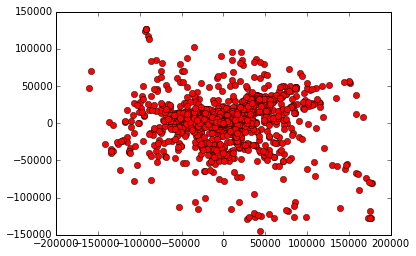

In [132]:
l,u = k_eigen_finder(cov_x, 10, 2, i_guess)
base_2 = np.dot(cov_x,u)
#print base_2
explained_cov = np.divide(np.sum(l), cov_x.sum())
#print explained_cov
print base_2[:,0]
plt.plot(base_2[:,0], base_2[:,1], 'ro')
plt.show()

In [ ]:
l,u = k_eigen_finder(cov_x, 10, 3, i_guess)
base_3 = np.dot(cov_x,u)
print base_3
explained_cov = np.divide(np.sum(l), cov_x.sum())

# Conclusiones

# Referencias